# Lesson 1 - What's your pet

In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
# Settting the batch size
bs = 64

# Looking at the data

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/home/carter/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'

Taking a peek at the data

In [12]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images/Ragdoll_107.jpg'),
 PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images/Birman_71.jpg'),
 PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_161.jpg'),
 PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_51.jpg'),
 PosixPath('/home/carter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_61.jpg')]

In [14]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [26]:
data = ImageDataBunch.from_name_re(
    path_img, 
    fnames, 
    pat, 
    ds_tfms=get_transforms(), 
    size=224, 
    bs=bs
).normalize(imagenet_stats)

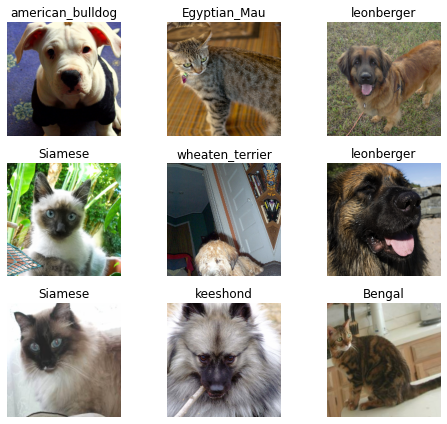

In [28]:
data.show_batch(rows=3, figsize=(7,6))

In [29]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training: resnet34

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/carter/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100.0%


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.382628,0.315141,0.099459,00:28
1,0.613407,0.286192,0.092693,00:29
2,0.409784,0.241812,0.077131,00:30
3,0.282929,0.207658,0.069012,00:31


In [33]:
learn.save('stage-1')

# Results

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

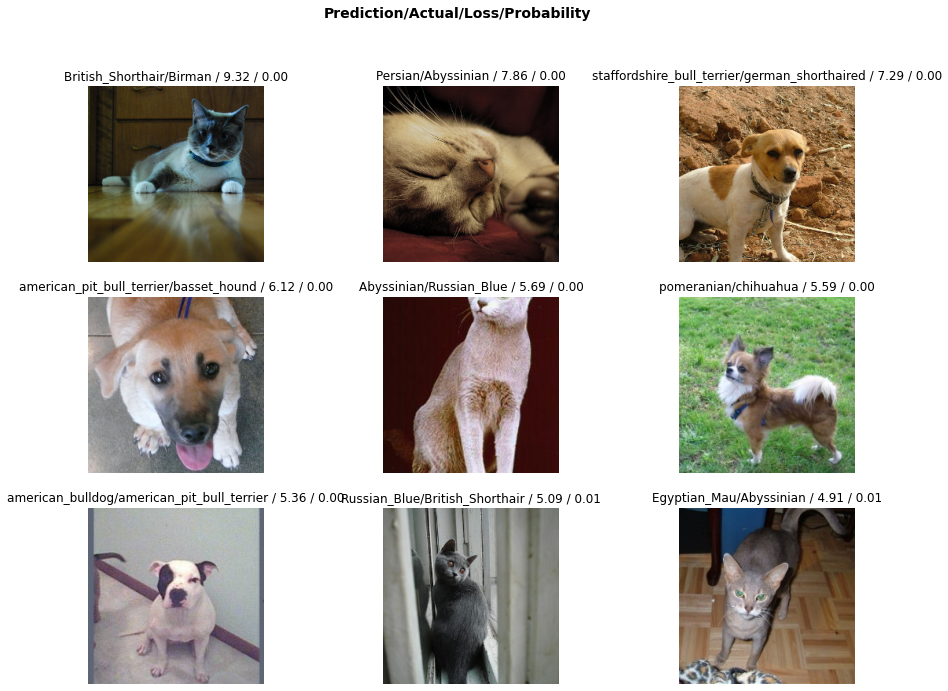

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

In [36]:
doc(interp.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

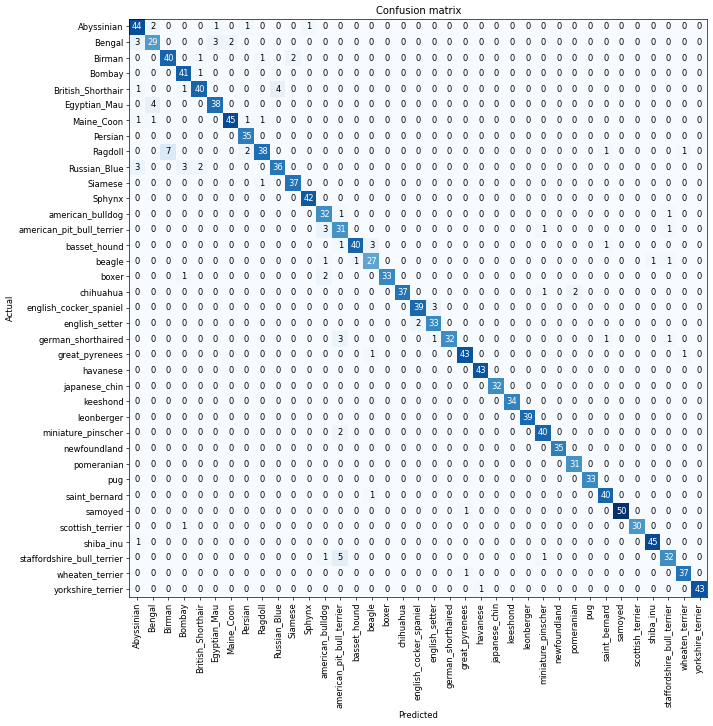

In [37]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [38]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Russian_Blue', 'Abyssinian', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('basset_hound', 'beagle', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('german_shorthaired', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Siamese', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'pomeranian', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

# Unfreezing, fine-tuning, and learning rates

In [39]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.680429,0.363655,0.108931,00:32


In [42]:
learn.load('stage-1');

In [43]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


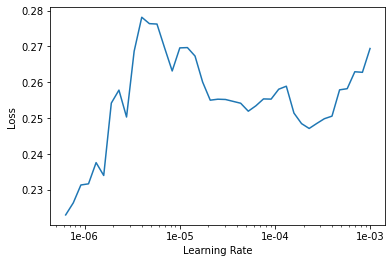

In [44]:
learn.recorder.plot()

In [45]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.239839,0.200837,0.066982,00:33
1,0.223750,0.200278,0.062923,00:33


Not a bad model!

# Other Data Formats

In [46]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/carter/.fastai/data/mnist_sample')

In [47]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

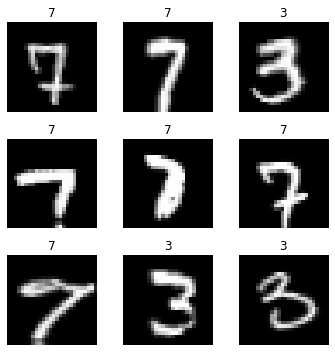

In [48]:
data.show_batch(rows=3, figsize=(5, 5))

In [49]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/carter/.cache/torch/checkpoints/resnet18-5c106cde.pth
100.0%


epoch,train_loss,valid_loss,accuracy,time
0,0.208275,0.118965,0.957311,00:03
1,0.119722,0.061165,0.978410,00:03


In [50]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [51]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

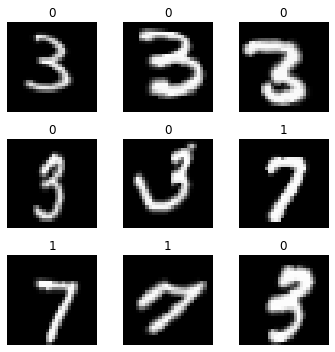

In [52]:
data.show_batch(rows=3, figsize=(5,5))
data.classes